# Technical Project

# Analysis of Electrical Consumption | QUERY PAGE
### Data set: 'Steel Industry Data'

### Ethan Gueck
### April 2024

#### Overview: 
This notebook is intended to provide a format to easily and quickly ask questions of the data and visualize some of the results.

In [1]:
# IMPORTS:

# General Imports.
import pandas as pd # Pandas import.
import matplotlib as mpl # Matplotlib import.
import matplotlib.pyplot as plt # Pyplot import.
import seaborn as sns # Seaborn import.
import numpy as np # Numpy import.

print(plt.style.available)
# SETTINGS:
plt.style.use('dark_background')

C:\Users\egueck\AppData\Local\Temp\ipykernel_66408\3853895015.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # Pandas import.


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
data = pd.read_csv('Steel_industry_data.csv') # Import the CSV data and assign to data frame (DF). (Ensure CSV is in the same folder as program.)
data['active_power_watts'] = data['Usage_kWh'] * 1000 / 0.25 # Calculate Active Power.
data['day'] = pd.to_datetime(data['date'], dayfirst=True).dt.day # Isolate Day from Date.
data['month'] = pd.to_datetime(data['date'], dayfirst=True).dt.month # Isolate Month from Date.
data['year'] = pd.to_datetime(data['date'], dayfirst=True).dt.year # Isolate Year from Date.
print(data.columns)

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'active_power_watts', 'day',
       'month', 'year'],
      dtype='object')


In [3]:
# Define plotting fuction. 
def plot_snap_shot(data_input,
                   var, # var one is used as y.
                   var2, # var2 is used as x.
                   colors = sns.color_palette("BuPu"), # Set color palet.
                   filtered_col = "N/A",
                   filter_applied = "N/A"
                   ):
        
        df_grouped_for_ts = data_input.copy() # Copy data for the purpose of creating month-year buckets.
        df_grouped_for_ts['date'] = pd.to_datetime(df_grouped_for_ts['date'], format='%d/%m/%Y %H:%S') # Assign date format.
        df_grouped_for_ts['month_year'] = df_grouped_for_ts['date'].dt.to_period('M') # Isolate month-year buckets.
        df_grouped_for_ts = df_grouped_for_ts.groupby('month_year')['active_power_watts'].sum().reset_index() # Sum active power by buckets.
        df_grouped_for_ts['month_year'] = df_grouped_for_ts['month_year'].astype(str) # Ensure that the month-year buckets are strings.

        var_name = var.name.title().replace('_', ' ') # Assign variable string name.
        var2_name = var2.name.title().replace('_', ' ') # Assign variable string name.
        var_sum_by_var2 = var.groupby(var2).sum() # Used for pie chart for buckets.

        var_sum, var_avg, var_std, var_max, var_min = np.sum(var), np.average(var), np.std(var), np.max(var), np.min(var) # Calculate target variable standard agg funcs.

        fig = plt.figure(figsize=(12, 8)) # Initialize figure.
        gs = fig.add_gridspec(2, 2, height_ratios=[1.25, 1]) 
        


        plt.suptitle(f'{var_name} Snapshot | Filterd {filtered_col} by {filter_applied}', fontsize=16, y=0.95, color='white') # Add plot title.

        ax1 = fig.add_subplot(gs[0, :]) # Add subplot 1.
        plt.title('Time Series Plot of Active Power (watts)', fontweight='bold', fontsize=12, color=colors[1]) # Set title.
        sns.lineplot(x='month_year', y='active_power_watts', data=df_grouped_for_ts, marker='o') # Initialize line plot.
        plt.xlabel('Date', fontweight='regular', fontsize=11, color=colors[1]) # Add x label.
        plt.ylabel('Active Power (watts)', fontweight='regular', fontsize=11, color=colors[1]) # Add y label.
        plt.grid(axis='x', alpha=0) # Add x grid.
        plt.grid(axis='y', alpha=0.2) # Add y grid.
        plt.xticks(rotation=45) # Rotate X tick marks.
        plt.subplots_adjust(bottom=-0.2)

        fig.subplots_adjust(hspace=0.3) 
        ax1.axhline(y=250, color='black', linestyle='--', linewidth=1)

        ax2 = fig.add_subplot(gs[1, 0]) # Add subplot 2.
        plt.title(f'Boxen Plot of {var_name}', fontweight='bold', fontsize=12, color=colors[1]) # Set title.
        sns.boxenplot(y=var, data=data_input, color=colors[4], linewidth=1.5) # Initialize boxen plot.
        plt.ylabel(var_name, fontweight='regular', fontsize=11, color=colors[1]) # Add y label.

        ax3 = fig.add_subplot(gs[1, 1]) # Add subplot 3.
        plt.title(f'{var_name} by {var2_name}', fontweight='bold', fontsize=12, color=colors[1]) # Set title.
        plt.pie(var_sum_by_var2, labels=var_sum_by_var2.index, colors=sns.color_palette(colors), autopct='%1.1f%%') # Initialize pie plot.
        plt.ylabel('') # Add y label.

        plt.show()
        
        # ____________________________________________


        fig, ax = plt.subplots(figsize=(2, 1)) # Add second plot for basic statistics.

        # Fromat text.
        text_content = (
            f"Statistics for {var_name}:\n"
            f"Sum: {var_sum:.2f}\n"
            f"Average: {var_avg:.2f}\n"
            f"Std Dev: {var_std:.2f}\n"
            f"Max: {var_max:.2f}\n"
            f"Min: {var_min:.2f}"
        )
        # Add text Plot.
        ax.text(0, 0.9, text_content, fontsize=14, color="white", bbox=dict(facecolor='#b7c3c7', alpha=0.5),
                ha='center', va='center')
        ax.axis('off')
        plt.show()


In [4]:
filters_dict = {'Day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'year': [2018]} # Populate dictionary where keys are cols and the values are the filters.

# Define filtering function.
def filteredData(data = data, filters_dict = filters_dict):
    filtered_data = data.copy()
    for key, value in filters_dict.items(): # For filter items filter column using key-value pairs.
        filtered_data = filtered_data[filtered_data[key].isin(value)]
    return filtered_data

filtered_data = filteredData() # Call filtered_data.
print(filtered_data.columns)
print(filtered_data.shape)
    

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'active_power_watts', 'day',
       'month', 'year'],
      dtype='object')
(25056, 15)


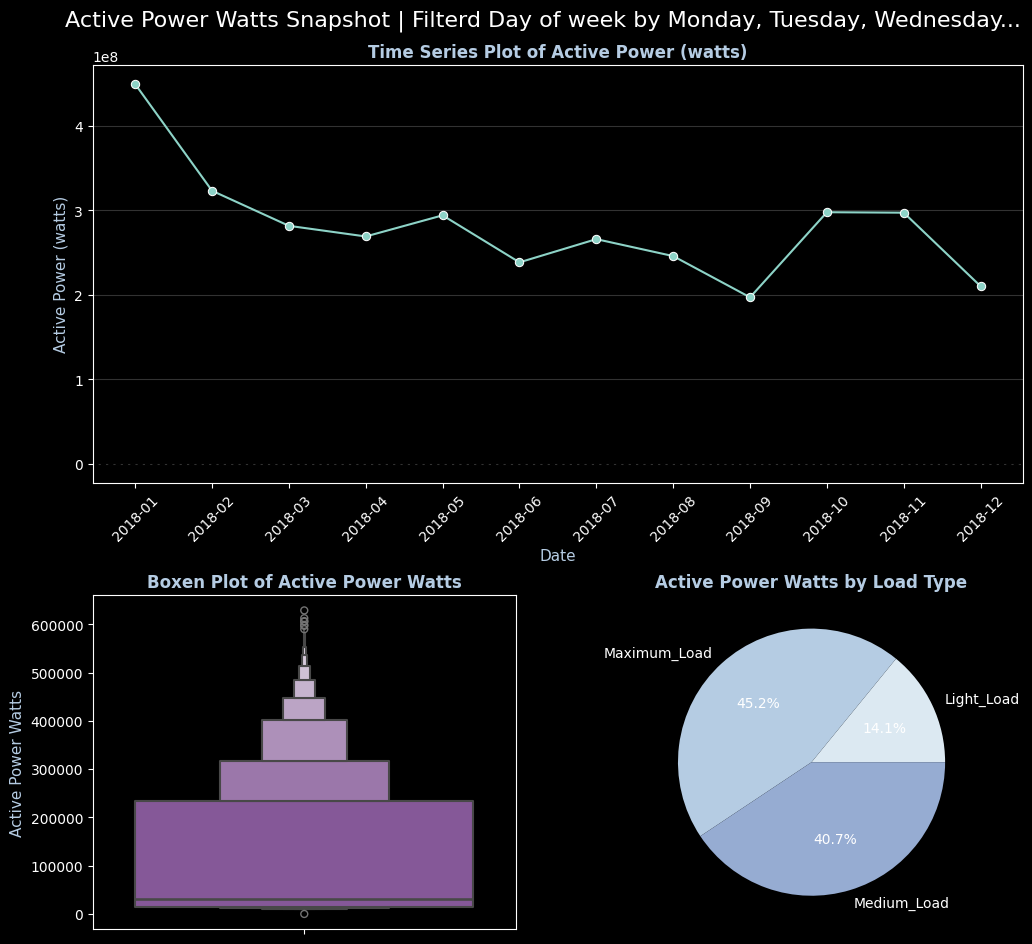

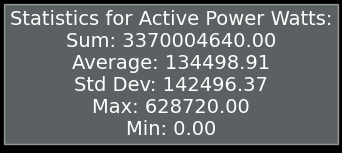

In [5]:
# Run plotting function with filtered data.
plot_snap_shot(data_input=filtered_data, 
               filtered_col="Day of week",  # Example column name, replace with the actual column name.
               filter_applied = ', '.join(map(str, filters_dict[next(iter(filters_dict))][:3])) + "..." if len(filters_dict[next(iter(filters_dict))]) > 3 else ', '.join(map(str, filters_dict[next(iter(filters_dict))])),
               var = filtered_data['active_power_watts'],
               var2 = filtered_data['Load_Type']
)